In [1]:
import pandas as pd

# Load data from attached dataset
df = pd.read_csv('/kaggle/input/nutritional-values-for-common-foods-and-products/nutrition.csv')

# Display basic info
print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# Display first 5 rows
df.head()



Dataset shape: (8789, 77)

Columns:
 ['Unnamed: 0', 'name', 'serving_size', 'calories', 'total_fat', 'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate', 'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin', 'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta', 'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12', 'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha', 'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese', 'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine', 'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine', 'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine', 'methionine', 'phenylalanine', 'proline', 'serine', 'threonine', 'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars', 'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose', 'fat', 'saturated_fatty_acids', 'monounsaturated_fatty_acids', 'polyunsaturated_fa

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [2]:
import numpy as np

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'serving_size'], errors='ignore')

# Function to clean numeric columns (remove units like 'g', 'mg', etc.)
def clean_numeric(val):
    if isinstance(val, str):
        val = val.replace('g', '').replace('mg', '').replace('mcg', '').strip()
        return pd.to_numeric(val, errors='coerce')
    return val

# Apply cleaning to all numeric columns except 'name'
for col in df.columns:
    if col != 'name':
        df[col] = df[col].apply(clean_numeric)

# Replace missing values with 0
df = df.fillna(0)

# Select key features for our first model
essential_cols = [
    'calories', 'protein', 'fat', 'carbohydrate', 'fiber', 'sugars',
    'sodium', 'cholesterol', 'vitamin_c', 'calcium', 'iron'
]
# Ensure these exist in dataset
essential_cols = [c for c in essential_cols if c in df.columns]

df_core = df[['name'] + essential_cols].copy()

# Show result
print("Shape after cleaning:", df_core.shape)
df_core.head(10)


Shape after cleaning: (8789, 11)


,name,calories,protein,fat,carbohydrate,fiber,sugars,sodium,cholesterol,vitamin_c,calcium
0,Cornstarch,381,0.26,0.05,91.27,0.9,0.00,0.0,0.0,0.0,0.0
1,"Nuts, pecans",691,9.17,71.97,13.86,9.6,3.97,0.0,0.0,0.0,0.0
2,"Eggplant, raw",25,0.98,0.18,5.88,3.0,3.53,0.0,0.0,0.0,0.0
3,"Teff, uncooked",367,13.30,2.38,73.13,8.0,1.84,0.0,0.0,0.0,0.0
4,"Sherbet, orange",144,1.10,2.00,30.40,1.3,24.32,0.0,0.0,0.0,0.0
5,"Cauliflower, raw",25,1.92,0.28,4.97,2.0,1.91,0.0,0.0,0.0,0.0
6,"Taro leaves, raw",42,4.98,0.74,6.70,3.7,3.01,0.0,0.0,0.0,0.0
7,"Lamb, raw, ground",282,16.56,23.41,0.00,0.0,0.00,0.0,0.0,0.0,0.0
8,"Cheese, camembert",300,19.80,24.26,0.46,0.0,0.46,0.0,0.0,0.0,0.0
9,Vegetarian fillets,290,23.00,18.00,9.00,6.1,0.80,0.0,0.0,0.0,0.0


          calories      protein          fat  carbohydrate        fiber  \
count  8789.000000  8789.000000  8789.000000   8789.000000  8789.000000   
mean    226.283878    11.345616    10.550794     22.121915     2.040073   
std     169.862001    10.530602    15.814870     27.266261     4.269181   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%      91.000000     2.380000     0.950000      0.050000     0.000000   
50%     191.000000     8.020000     5.130000      9.340000     0.400000   
75%     337.000000    19.880000    13.720000     34.910000     2.400000   
max     902.000000    88.320000   100.000000    100.000000    79.000000   

            sugars  sodium  cholesterol  vitamin_c  calcium  
count  8789.000000  8789.0       8789.0     8789.0   8789.0  
mean      6.756293     0.0          0.0        0.0      0.0  
std      13.718890     0.0          0.0        0.0      0.0  
min       0.000000     0.0          0.0        0.0      0.0  
25%       0.00

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


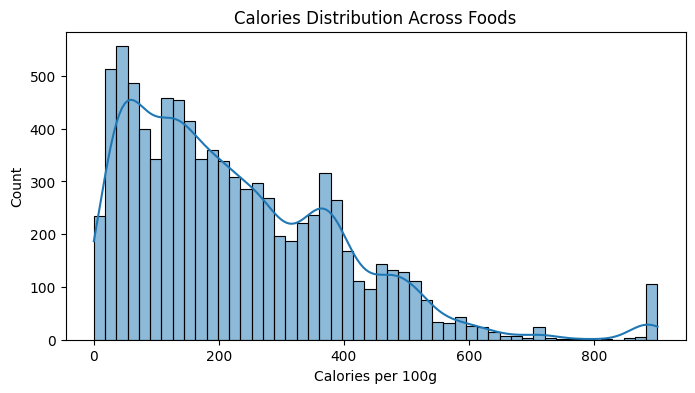

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

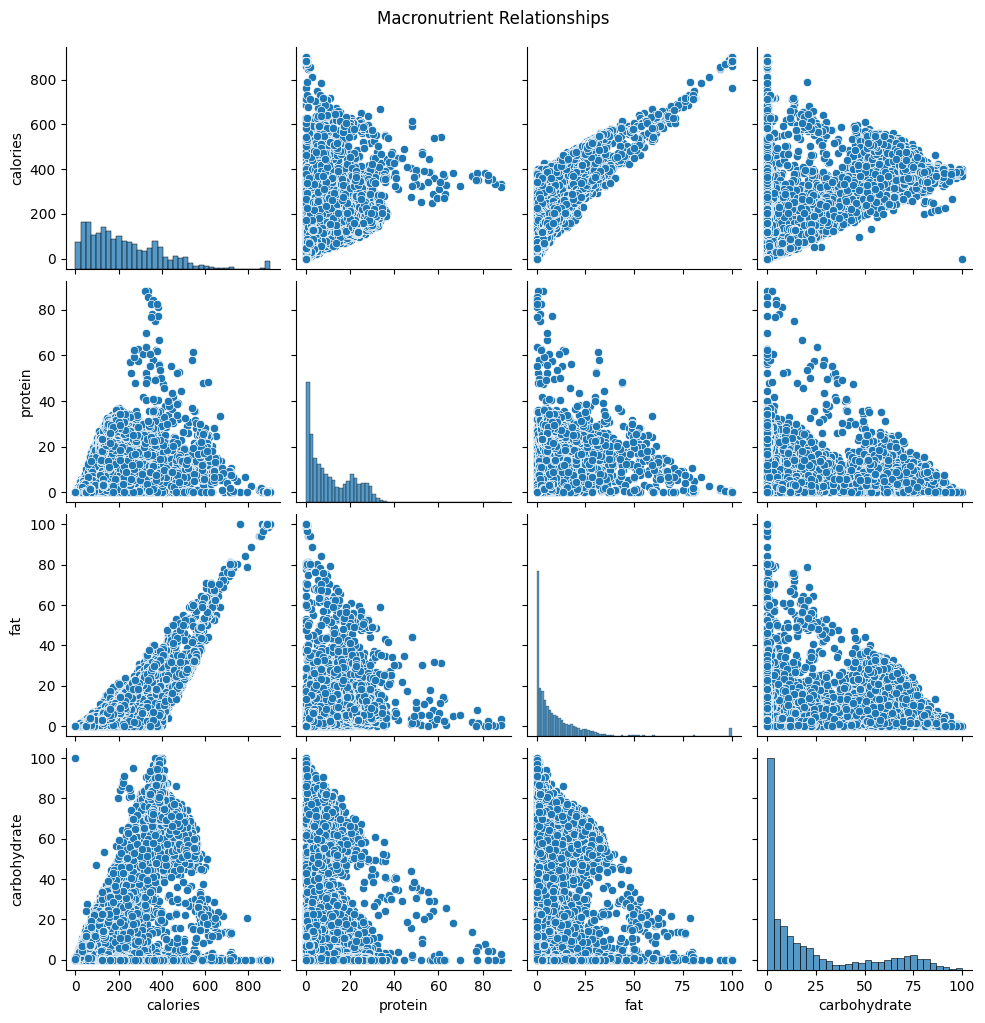

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


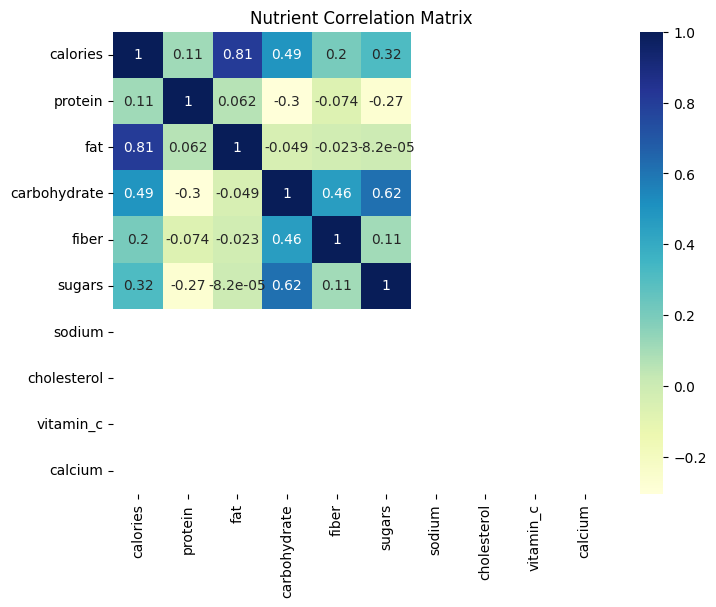


✅ All graphs saved successfully in '/kaggle/working/plots/'


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("/kaggle/working/plots", exist_ok=True)

print(df_core.describe())

# --- 1. Distribution of calories ---
plt.figure(figsize=(8,4))
sns.histplot(df_core['calories'], bins=50, kde=True)
plt.title("Calories Distribution Across Foods")
plt.xlabel("Calories per 100g")
plt.ylabel("Count")
plt.savefig('/kaggle/working/plots/calories_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# --- 2. Pairplot for macros ---
pairplot = sns.pairplot(df_core[['calories', 'protein', 'fat', 'carbohydrate']])
pairplot.fig.suptitle("Macronutrient Relationships", y=1.02)
pairplot.savefig('/kaggle/working/plots/macronutrient_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

# --- 3. Correlation heatmap ---
plt.figure(figsize=(8,6))
# Keep only numeric columns
corr = df_core.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title("Nutrient Correlation Matrix")
plt.savefig('/kaggle/working/plots/nutrient_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ All graphs saved successfully in '/kaggle/working/plots/'")


In [4]:
# Focused re-cleaning for specific columns
for col in ['sodium', 'cholesterol', 'vitamin_c', 'calcium']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('mg', '').str.replace('mcg', '').str.replace('g', '')
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing with 0
df[['sodium', 'cholesterol', 'vitamin_c', 'calcium']] = df[['sodium', 'cholesterol', 'vitamin_c', 'calcium']].fillna(0)

# Rebuild core dataset
df_core = df[['name', 'calories', 'protein', 'fat', 'carbohydrate', 'fiber', 'sugars', 'sodium', 'cholesterol', 'vitamin_c', 'calcium']]

# Verify again
df_core.describe()


,calories,protein,fat,carbohydrate,fiber,sugars,sodium,cholesterol,vitamin_c,calcium
count,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.0,8789.0,8789.0,8789.0
mean,226.283878,11.345616,10.550794,22.121915,2.040073,6.756293,0.0,0.0,0.0,0.0
std,169.862001,10.530602,15.814870,27.266261,4.269181,13.718890,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,91.000000,2.380000,0.950000,0.050000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,191.000000,8.020000,5.130000,9.340000,0.400000,0.490000,0.0,0.0,0.0,0.0
75%,337.000000,19.880000,13.720000,34.910000,2.400000,6.050000,0.0,0.0,0.0,0.0
max,902.000000,88.320000,100.000000,100.000000,79.000000,99.800000,0.0,0.0,0.0,0.0


In [5]:
def food_category(row):
    if row['protein'] >= 20 and row['fat'] <= 15 and row['carbohydrate'] <= 20:
        return 'High-Protein'
    elif row['carbohydrate'] <= 10 and row['fat'] <= 20:
        return 'Low-Carb'
    elif row['fiber'] >= 5:
        return 'High-Fiber'
    else:
        return 'Balanced'

df_core['category'] = df_core.apply(food_category, axis=1)

df_core['category'].value_counts()
df_core.head(10)


/tmp/ipykernel_48/767708318.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_core['category'] = df_core.apply(food_category, axis=1)


,name,calories,protein,fat,carbohydrate,fiber,sugars,sodium,cholesterol,vitamin_c,calcium,category
0,Cornstarch,381,0.26,0.05,91.27,0.9,0.00,0.0,0.0,0.0,0.0,Balanced
1,"Nuts, pecans",691,9.17,71.97,13.86,9.6,3.97,0.0,0.0,0.0,0.0,High-Fiber
2,"Eggplant, raw",25,0.98,0.18,5.88,3.0,3.53,0.0,0.0,0.0,0.0,Low-Carb
3,"Teff, uncooked",367,13.30,2.38,73.13,8.0,1.84,0.0,0.0,0.0,0.0,High-Fiber
4,"Sherbet, orange",144,1.10,2.00,30.40,1.3,24.32,0.0,0.0,0.0,0.0,Balanced
5,"Cauliflower, raw",25,1.92,0.28,4.97,2.0,1.91,0.0,0.0,0.0,0.0,Low-Carb
6,"Taro leaves, raw",42,4.98,0.74,6.70,3.7,3.01,0.0,0.0,0.0,0.0,Low-Carb
7,"Lamb, raw, ground",282,16.56,23.41,0.00,0.0,0.00,0.0,0.0,0.0,0.0,Balanced
8,"Cheese, camembert",300,19.80,24.26,0.46,0.0,0.46,0.0,0.0,0.0,0.0,Balanced
9,Vegetarian fillets,290,23.00,18.00,9.00,6.1,0.80,0.0,0.0,0.0,0.0,Low-Carb


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Prepare data
X = df_core[['calories', 'protein', 'fat', 'carbohydrate', 'fiber', 'sugars']].values
y = df_core['category'].values

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Neural network architecture
class DietNet(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, output_size):
        super(DietNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.1)
        self.output = nn.Linear(hidden2, output_size)
    
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu2(self.fc2(x))
        x = self.dropout2(x)
        return self.output(x)

# Initialize model
input_size = X_train.shape[1]
hidden1, hidden2 = 64, 32
output_size = len(np.unique(y_encoded))
model = DietNet(input_size, hidden1, hidden2, output_size)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 30
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        _, preds = torch.max(outputs, 1)
        acc = (preds == y_train_tensor).float().mean()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Train Accuracy: {acc.item()*100:.2f}%")

# Evaluation
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, test_preds = torch.max(test_outputs, 1)
    test_acc = (test_preds == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {test_acc.item()*100:.2f}%")

print("\nLabel mapping:")
for i, label in enumerate(le.classes_):
    print(f"{i}: {label}")



Epoch [5/30], Loss: 1.3418, Train Accuracy: 45.09%
Epoch [10/30], Loss: 1.2759, Train Accuracy: 53.58%
Epoch [15/30], Loss: 1.2098, Train Accuracy: 57.63%
Epoch [20/30], Loss: 1.1484, Train Accuracy: 60.55%
Epoch [25/30], Loss: 1.0863, Train Accuracy: 64.97%
Epoch [30/30], Loss: 1.0218, Train Accuracy: 69.98%

Test Accuracy: 74.06%

Label mapping:
0: Balanced
1: High-Fiber
2: High-Protein
3: Low-Carb


In [7]:
import random
import torch.nn.functional as F

# Function to recommend foods based on user goal
def recommend_food(goal, top_n=5):
    goal_map = {
        'muscle_gain': 'High-Protein',
        'weight_loss': 'Low-Carb',
        'fiber_rich': 'High-Fiber',
        'balanced': 'Balanced'
    }

    if goal not in goal_map:
        print("Invalid goal. Choose from: muscle_gain, weight_loss, fiber_rich, balanced")
        return

    target_category = goal_map[goal]
    print(f"\nUser goal → {goal.replace('_', ' ').title()}")
    print(f"Model target category → {target_category}\n")

    # Filter foods of that category
    subset = df_core[df_core['category'] == target_category]

    # Randomly sample n foods
    if len(subset) == 0:
        print("No foods found for this category.")
        return

    suggestions = subset.sample(n=min(top_n, len(subset)))
    return suggestions[['name', 'calories', 'protein', 'fat', 'carbohydrate', 'fiber', 'sugars', 'category']]

# Example usage
for g in ['muscle_gain', 'weight_loss', 'fiber_rich', 'balanced']:
    print("="*40)
    print(f"Recommendations for goal: {g}")
    print("="*40)
    display(recommend_food(g))


Recommendations for goal: muscle_gain

User goal → Muscle Gain
Model target category → High-Protein



,name,calories,protein,fat,carbohydrate,fiber,sugars,category
8379,"Beef, braised, cooked, select, trimmed to 0"" f...",216,30.68,9.44,0.00,0.0,0.0,High-Protein
6342,"Lamb, raw, separable lean and fat, fore-shank,...",183,20.09,11.38,0.09,0.0,0.0,High-Protein
7660,"Beef, broiled, cooked, all grades, trimmed to ...",216,25.73,11.73,0.00,0.0,0.0,High-Protein
5355,"MORNINGSTAR FARMS Breakfast Pattie, unprepared...",195,23.70,8.30,12.60,7.6,2.2,High-Protein
3867,"Chicken, pan-browned, cooked, crumbles, ground",189,23.28,10.92,0.00,0.0,0.0,High-Protein


Recommendations for goal: weight_loss

User goal → Weight Loss
Model target category → Low-Carb



,name,calories,protein,fat,carbohydrate,fiber,sugars,category
5722,"Beans, solids and liquids, seasoned, all style...",16,0.83,0.20,3.49,1.5,0.00,Low-Carb
6584,"Infant formula, ready-to-feed, low iron, SIMIL...",65,1.36,3.55,6.93,0.0,6.93,Low-Carb
7270,"Leeks, without salt, drained, boiled, cooked, ...",31,0.81,0.20,7.62,1.0,2.11,Low-Carb
7306,"Peppers, with salt, drained, boiled, cooked, c...",16,0.95,0.18,3.31,0.9,0.00,Low-Carb
4932,"CAMPBELL'S CHUNKY Soups, Old Fashioned Potato ...",78,2.45,4.49,6.94,1.2,0.41,Low-Carb


Recommendations for goal: fiber_rich

User goal → Fiber Rich
Model target category → High-Fiber



,name,calories,protein,fat,carbohydrate,fiber,sugars,category
6440,"Cereals ready-to-eat, KELLOGG'S SPECIAL K Mult...",362,7.80,1.80,85.00,8.6,26.40,High-Fiber
3019,"KELLOGG'S, Savory Herb Crackers, SPECIAL K",406,10.90,10.00,73.80,9.8,10.60,High-Fiber
7385,"Nuts, without salt, all flavors except macadam...",647,13.11,62.30,20.79,5.2,0.00,High-Fiber
5383,"Cereals ready-to-eat, Whole Grain TOTAL, GENER...",320,8.40,2.10,74.70,9.1,16.40,High-Fiber
1438,"Burrito, microwaved, beef and bean",298,8.73,11.94,38.95,6.9,1.36,High-Fiber


Recommendations for goal: balanced

User goal → Balanced
Model target category → Balanced



,name,calories,protein,fat,carbohydrate,fiber,sugars,category
5799,"Beverages, canned, without added nutrients, fr...",48,0.00,0.00,11.97,0.0,11.29,Balanced
8045,"Fast foods, vegetables and mayonnaise, large p...",226,11.34,12.37,17.33,1.5,4.00,Balanced
8380,"Lamb, cooked, choice, trimmed to 1/4"" fat, sep...",294,24.52,20.94,0.00,0.0,0.00,Balanced
314,"Whey, dried, sweet",353,12.93,1.07,74.46,0.0,74.46,Balanced
1616,"Beverages, powder, rich chocolate",372,0.00,0.00,92.96,0.0,81.82,Balanced


In [14]:
%%writefile diet_app.py
import streamlit as st
import pandas as pd
import torch
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
import random
df_core = pd.read_csv("nutrition.csv")


st.set_page_config(page_title="AI Diet Recommendation System", layout="centered")

st.title("🥗 AI-Powered Diet Recommendation System")

st.sidebar.header("User Profile")
age = st.sidebar.number_input("Age", 10, 100, 25)
gender = st.sidebar.selectbox("Gender", ["Male", "Female", "Other"])
height = st.sidebar.number_input("Height (cm)", 100, 220, 170)
weight = st.sidebar.number_input("Weight (kg)", 30, 200, 70)
activity = st.sidebar.selectbox("Activity Level", 
    ["Sedentary", "Light", "Moderate", "Active", "Very Active"])
goal = st.sidebar.selectbox("Goal", 
    ["muscle_gain", "weight_loss", "fiber_rich", "balanced"])

# --- Calorie Estimation (Mifflin–St Jeor) ---
if gender == "Male":
    bmr = 10 * weight + 6.25 * height - 5 * age + 5
else:
    bmr = 10 * weight + 6.25 * height - 5 * age - 161

activity_factor = {
    "Sedentary": 1.2, "Light": 1.375, "Moderate": 1.55, 
    "Active": 1.725, "Very Active": 1.9
}[activity]

calories_needed = bmr * activity_factor
st.metric("Estimated Daily Calorie Need", f"{int(calories_needed)} kcal")

# --- Recommendation section ---
st.subheader("Your Personalized Diet Recommendations")

def recommend_food(goal, top_n=5):
    goal_map = {
        'muscle_gain': 'High-Protein',
        'weight_loss': 'Low-Carb',
        'fiber_rich': 'High-Fiber',
        'balanced': 'Balanced'
    }
    target_category = goal_map.get(goal, 'Balanced')
    subset = df_core[df_core['category'] == target_category]
    if len(subset) == 0:
        return pd.DataFrame({'name': ['No foods found for this goal.']})
    return subset.sample(n=min(top_n, len(subset)))[
        ['name','calories','protein','fat','carbohydrate','fiber','sugars','category']
    ]

if st.button("Generate Diet Plan"):
    recs = recommend_food(goal, top_n=5)
    st.dataframe(recs.reset_index(drop=True))
    st.success("✅ Diet plan generated successfully!")

st.markdown("---")
st.caption("Built with 💚 PyTorch + Streamlit on Kaggle Cloud CPU")


Overwriting diet_app.py


In [9]:
# Save your cleaned core dataset
df_core.to_csv("/kaggle/working/nutrition.csv", index=False)
print("✅ nutrition.csv saved successfully!")


✅ nutrition.csv saved successfully!


In [10]:
# Save the trained PyTorch model weights
torch.save(model.state_dict(), "/kaggle/working/model.pth")
print("✅ model.pth saved successfully!")


✅ model.pth saved successfully!


In [11]:
reqs = """streamlit
torch
pandas
numpy
scikit-learn
"""
with open("/kaggle/working/requirements.txt", "w") as f:
    f.write(reqs)

print("✅ requirements.txt created and saved!")


✅ requirements.txt created and saved!


In [13]:
readme = """# 🥗 AI Diet Recommendation System
This project is an AI-powered diet recommendation system built using PyTorch and Streamlit.
It predicts and suggests food items based on user goals like muscle gain, weight loss, or high fiber diets.

## Run locally
```bash
pip install -r requirements.txt
streamlit run diet_app.py
Developed in Kaggle by Divy Sharma 💚
"""
with open("/kaggle/working/README.md", "w") as f:
    f.write(readme)

print("✅ README.md generated successfully!")

✅ README.md generated successfully!
